## Telecom Churn Case Study

#### The data set contains data for four months- June,July,August,September. We will consider the months June and July as good phase, August as action phase and September as churn phase.
#### We will start with loading the necessary libraries and dataset.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',230)
pd.set_option('display.max_rows',300)
from sklearn.decomposition import PCA
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import IncrementalPCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [104]:
from sklearn.metrics import precision_score, recall_score

In [2]:
#Load the data
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Cleaning and Data Preparation

#### Handling missing values

In [6]:
# percentage of missing values in each column
round(telecom.isnull().sum()/len(telecom.index), 2)*100

mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

#### Since there are too many features int he dataset with missing values, it would be easier to crate a function to impute values.

In [7]:
def impute_0(data,imputeColList=False,missingColList=False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [8]:
telecom_missing = round(100*(telecom.isnull().sum()/len(telecom.mobile_number)), 2)
print(telecom_missing[telecom_missing > 50])
print("Total columns = " ,len(telecom_missing[telecom_missing > 50]))

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

#### Out of these 40 features some are essential.We can impute these values with 0 instead of dropping them

In [9]:
impute_columns = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
impute_0(telecom,impute_columns)

#### Let's check the missing values again.

In [10]:
telecom_missing = round(100*(telecom.isnull().sum()/len(telecom.mobile_number)), 2)
print(telecom_missing[telecom_missing > 50])
print("Total columns = " ,len(telecom_missing[telecom_missing > 50]))

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64
Total columns =  4


#### We can drop these features as they are not significant enough for our analysis.

In [11]:
missingcol = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom.drop(missingcol,axis=1,inplace=True)
telecom.shape

(99999, 222)

In [12]:
telecom_missing = round(100*(telecom.isnull().sum()/len(telecom.mobile_number)), 2)
print(telecom_missing[telecom_missing > 5])
print("Total columns = " ,len(telecom_missing[telecom_missing > 5]))

onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_8        5.38
std_og_mou_9        7.75
isd_og_mou_8        5.38
isd_og_mou_9        7.75
spl_og_mou_8        5.38
spl_og_mou_9        7.75
og_others_8         5.38
og_others_9         7.75
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75


#### All thse columns are for the month of september.

#### First let us define a funcition for obtaining columns with missing values. This will make further steps much easier.

In [13]:
def missingValueColumns(missingCutoff):
    missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
    print("There are {} columns with more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [14]:
missingValueColumns(5)

There are 29 columns with more than 5% missing values


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

#### Checking if all these above features go missing together since they have the same 8% missing values in each feature.

In [15]:
missingcol = list(missingValueColumns(5).index)
print ("There are %d customers having missing values for %s together"%(len(telecom[telecom[missingcol].isnull().all(axis=1)]),missingcol))
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 columns with more than 5% missing values
There are 7745 customers having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see that for 7745 customers, these columns are missing together. We can impute these missing values with 0 as well.

In [16]:
impute_0(telecom,missingColList=missingcol)

In [17]:
telecom=telecom[~telecom[missingcol].isnull().all(axis=1)]
telecom.shape

(99999, 222)

In [18]:
missingValueColumns(2)

telecom_missing = round(100*(telecom.isnull().sum()/len(telecom.mobile_number)), 2)
print(telecom_missing[telecom_missing > 50])
print("Total columns = " ,len(telecom_missing[telecom_missing > 50]))

There are 89 columns with more than 2% missing values
Series([], dtype: float64)
Total columns =  0


In [19]:
missingcol = list(missingValueColumns(2).index)
print ("There are %d customers having missing values for %s together"%(len(telecom[telecom[missingcol].isnull().all(axis=1)]),missingcol))
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 columns with more than 2% missing values
There are 381 customers having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7'

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It looks like there are 381 Customers for whom all these features are without any value. Let's drop these customers from the data.

In [20]:
telecom=telecom[~telecom[missingcol].isnull().all(axis=1)]
telecom.shape

(99618, 222)

#### For other customers where these missing values are spread out, let's impute them with zero. 

In [21]:
missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
impute_0(telecom,missingColList=missingcol)

In [22]:
missingValueColumns(0)

telecom_missing = round(100*(telecom.isnull().sum()/len(telecom.mobile_number)), 2)
print(telecom_missing[telecom_missing > 0])
print("Total columns = " ,len(telecom_missing[telecom_missing > 0]))

There are 9 columns with more than 0% missing values
loc_og_t2o_mou          0.64
std_og_t2o_mou          0.64
loc_ic_t2o_mou          0.64
last_date_of_month_7    0.32
last_date_of_month_8    0.75
last_date_of_month_9    1.30
date_of_last_rech_6     1.49
date_of_last_rech_7     1.47
date_of_last_rech_8     3.25
date_of_last_rech_9     4.40
dtype: float64
Total columns =  10


#### There are columns that have only one unique value throughout the data. We do not need them. Let us drop such columns as well. 

In [23]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,telecom[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [24]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
telecom.drop(col,axis=1,inplace=True)

#### Let us now look into the columns which have 0 as all the values

In [25]:
zero_columns=telecom.columns[(telecom == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 8 features which has only 0 as values. These features are 
Index(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [26]:
# Let's remove these columns as well. All take a single value '0'. 
telecom.drop(zero_columns,axis=1,inplace=True)

In [27]:
telecom.shape

(99618, 208)

#### We have no missing values in the dataset.

### Filtering High-value customers

#### Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). For this we need to create new features as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

#### From the data we can obtain the average recharge amount for both calls and data for 6th and 7th months (good phase months). In the next step we will multiply the number of recharges with average recharge amounts for both calls and data and then take average of the sum of the two.

In [28]:
for i in range(6,10):
    telecom['total_rech_num_data_'+str(i)] = (telecom['count_rech_2g_'+str(i)]+telecom['count_rech_3g_'+str(i)]).astype(int)

for i in range(6,10):
    telecom['total_rech_amt_data_'+str(i)] = telecom['total_rech_num_data_'+str(i)]*telecom['av_rech_amt_data_'+str(i)]

for i in range(6,10):
    telecom['total_month_rech_'+str(i)] = telecom['total_rech_amt_'+str(i)]+telecom['total_rech_amt_data_'+str(i)]

avg_goodPhase =(telecom.total_month_rech_6 + telecom.total_month_rech_7)/2

#### Now we will filter high value customers from others with a cutoff of 70 percentile.

In [29]:
hv_cutoff= np.percentile(avg_goodPhase,70)
hv_cust = telecom[avg_goodPhase >=  hv_cutoff]
hv_cust.reset_index(inplace=True,drop=True)
print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_cust))
print("Percentage High-value users in data : {}%".format(round(len(hv_cust)/telecom.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%


### Tagging churners
#### Depending on the usage of services in the 8th month, we will tag churners in the dataset. This new column will be our target variable.

In [30]:
hv_cust['churn'] = np.where(hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
hv_cust.head()

,mobile_number,circle_id,last_date_of_month_6,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9,churn
0,7000842753,109,6/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0

In [31]:
print("Churn/non churn percentage:")
round(hv_cust['churn'].value_counts()/len(hv_cust)*100,2)

Churn/non churn percentage:


0    91.91
1     8.09
Name: churn, dtype: float64

#### There are 8.09% churn cases in out high value data. This indicates imbalance in data which we will take care of later.

In [32]:
hv_cust.shape

(29906, 221)

#### There are few columns which needs to be renamed as they dont have the suffix _6,_7,_8,_9 in their names

In [33]:
hv_cust.rename({'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

#### Dropping few columns since we have already derived new variabes from them

In [34]:
del_col = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6',
          'count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
hv_cust.drop(del_col,axis=1,inplace=True)


In [35]:
hv_cust.shape

(29906, 209)

#### Creating new featue: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9' and then we will # drop the original columns.
#### These will store the total data volume (= vol_2gmb + vol_3gmb) used by user.

In [36]:
for i in range(6,10):
    telecom['vol_data_mb_'+str(i)] = (telecom['vol_2g_mb_'+str(i)]+telecom['vol_3g_mb_'+str(i)]).astype(int)

In [37]:
del_cols =['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9']
hv_cust.drop(del_cols,axis=1,inplace=True)


In [38]:
hv_cust.shape

(29906, 201)

### Analysing Data

#### Checking columns with unique values and dropping those having only one unique value

In [39]:
for i in hv_cust.columns:
    if hv_cust[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", hv_cust[i].nunique(),"unique value")
        print("Dropping the column",i)
        hv_cust.drop(i,axis=1,inplace = True)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6


In [40]:
hv_cust.shape

(29906, 199)

In [41]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = hv_cust.filter(regex=('_9')).columns
hv_cust.drop(col_9List,axis=1,inplace=True)

In [42]:
hv_cust.shape

(29906, 151)

In [43]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df_hv = hv_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df_hv, y=attribute+"_6",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df_hv, y=attribute+"_7",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df_hv, y=attribute+"_8",x="churn",hue="churn",showfliers=False)
    plt.show()

In [44]:
recharge_amnt_columns =  hv_cust.columns[hv_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

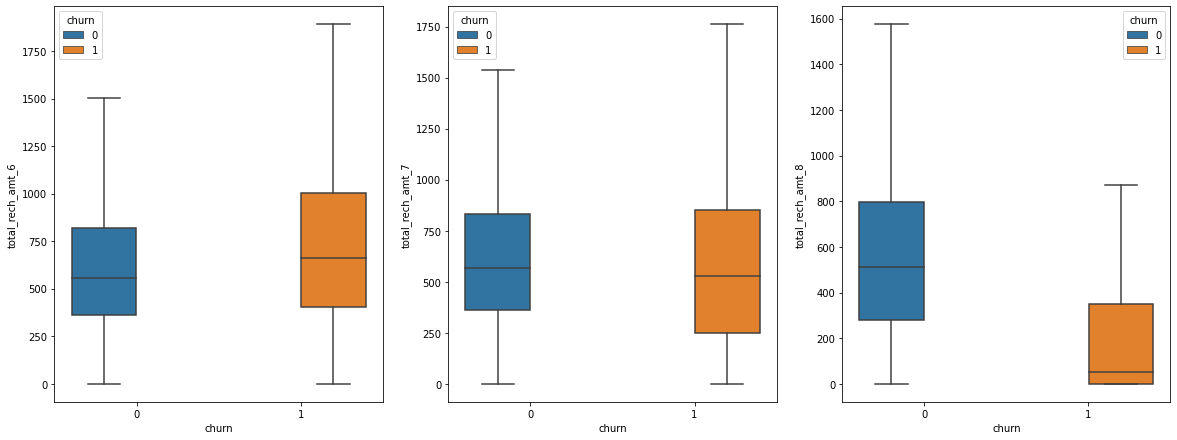

In [45]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

#### We can see a drop in total recharge amount for churned customers in the 8th month(Action phase)

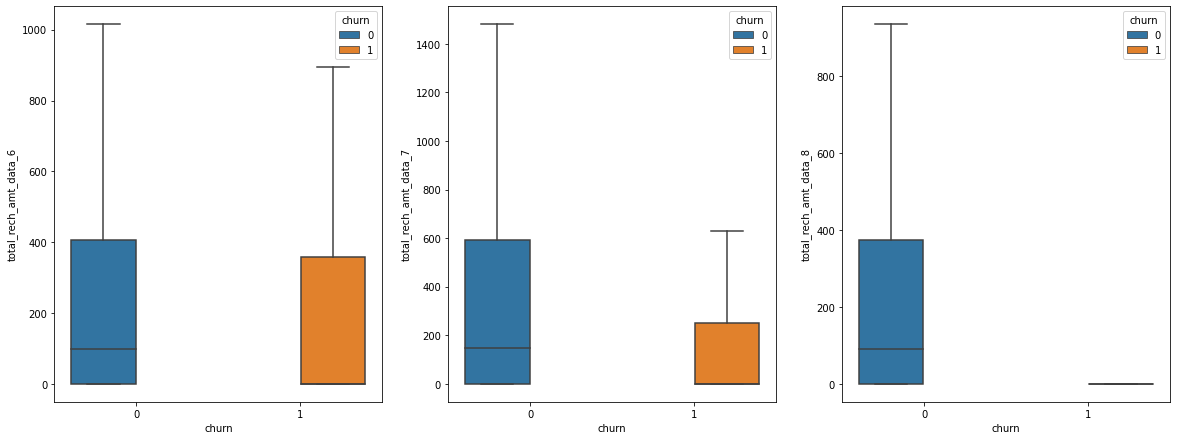

In [46]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

#### We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

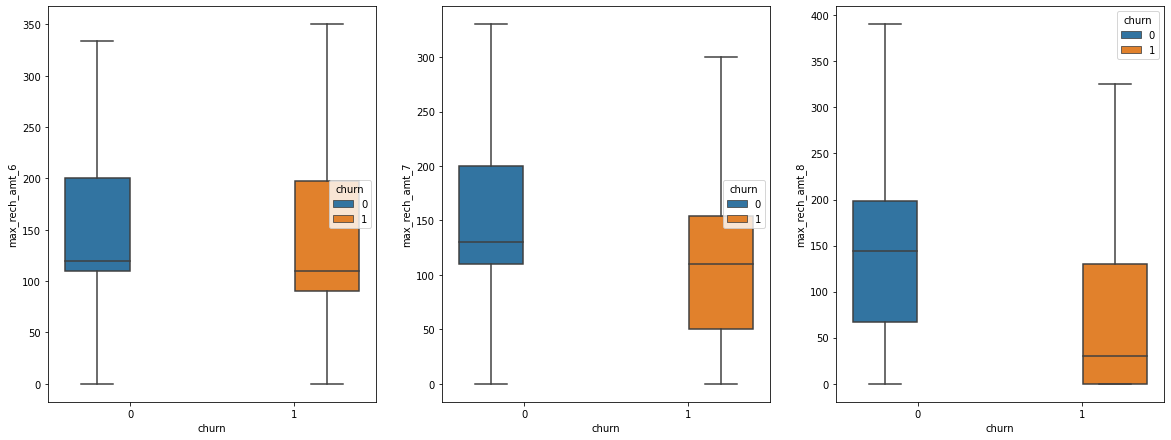

In [47]:
 #Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

#### We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

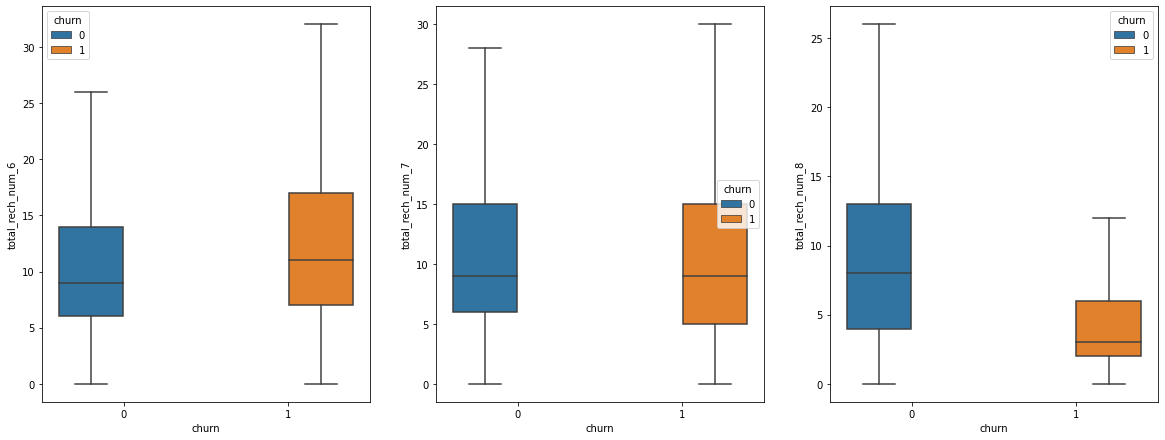

In [48]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

#### We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

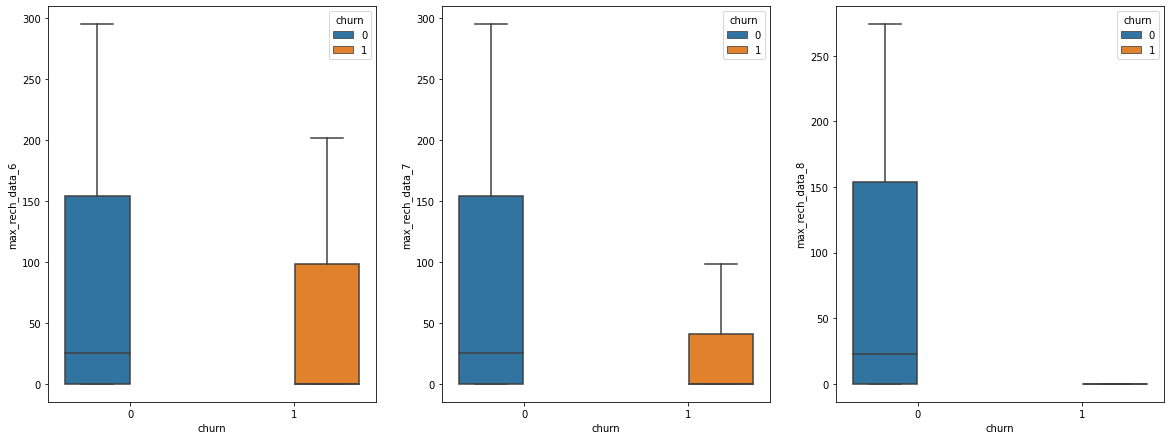

In [49]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

#### We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

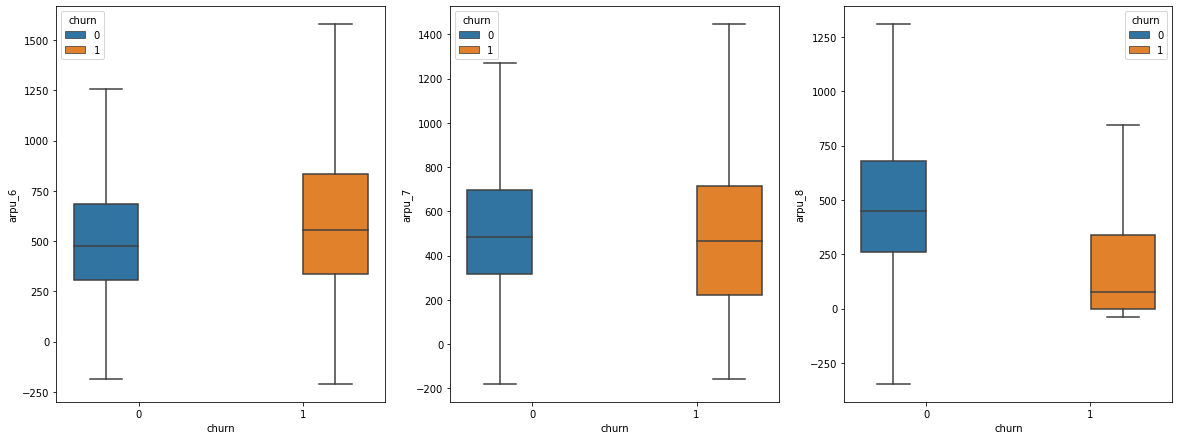

In [50]:
# Checking columns for average revenue per user
arpu_cols = hv_cust.columns[hv_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

#### We can see that huge drops for average revenue in 8th month for churned customers

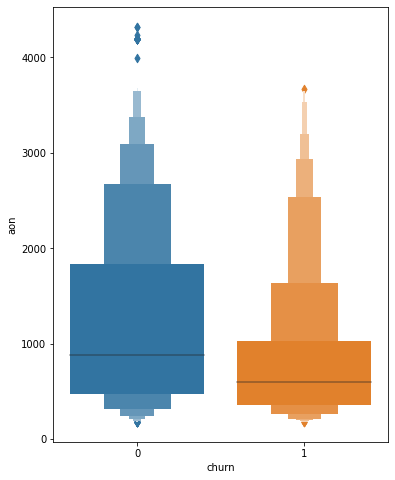

In [51]:
plt.figure(figsize=(6,8))
sns.boxenplot(data= hv_cust, x='churn', y='aon')
plt.show()

#### As we can see that customers with lower age on network are more likely to churn.

<AxesSubplot:>

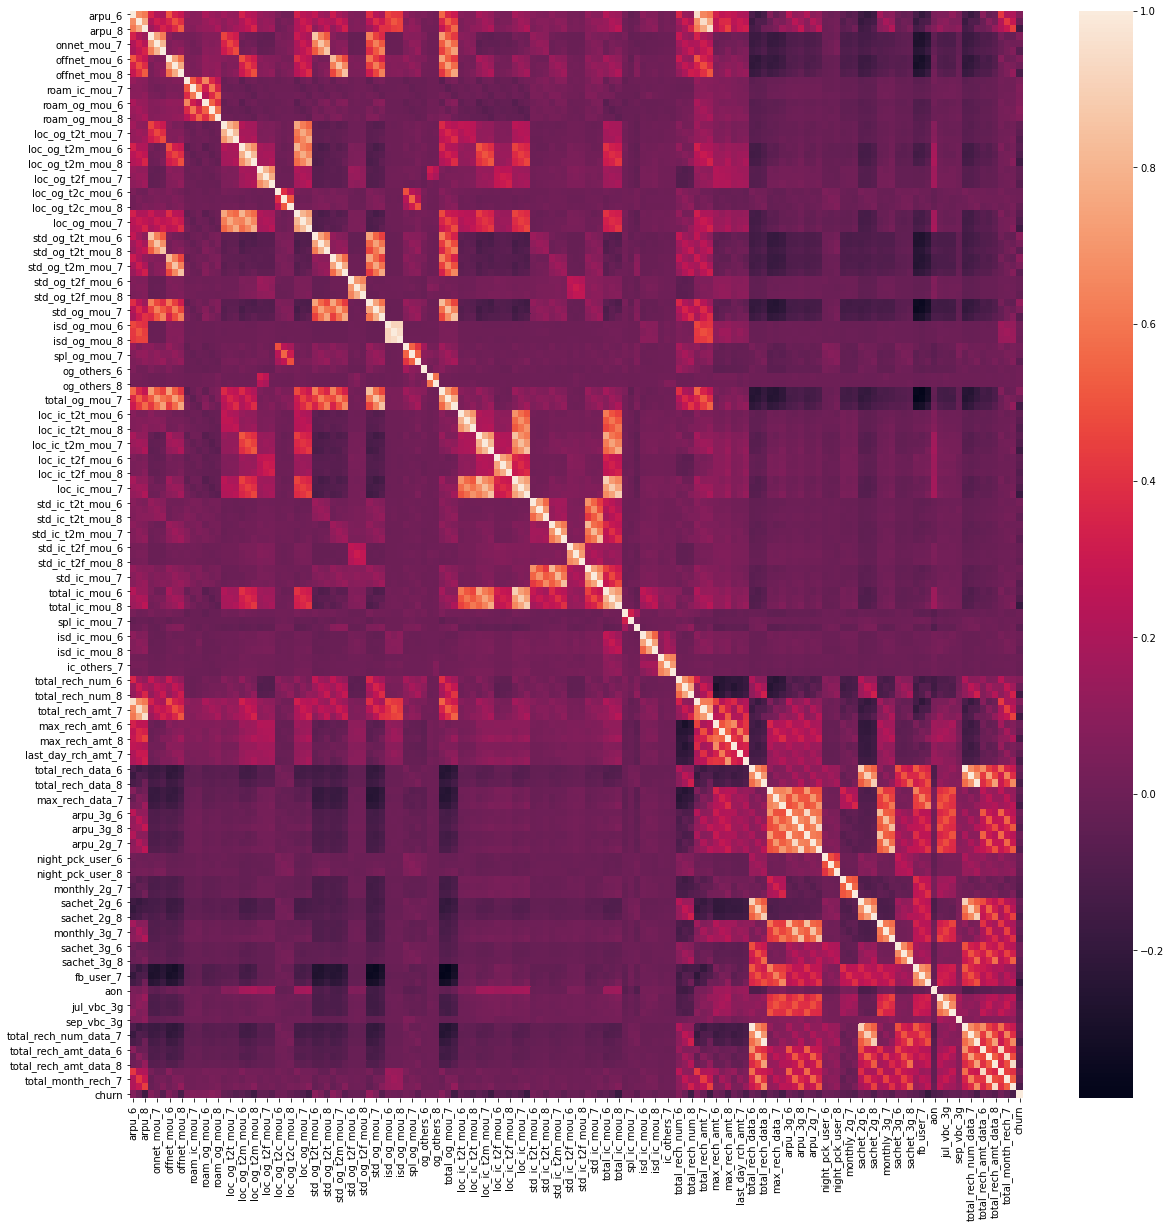

In [52]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(hv_cust.drop('mobile_number',axis=1).corr())

#### Hence there is a high correlation among many attributes

In [53]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = hv_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()

In [54]:
cor[(cor > 0.80) | (cor < -0.80)].sort_values()

loc_ic_t2t_mou_7       loc_ic_t2t_mou_6         0.801761
std_og_t2t_mou_8       std_og_t2t_mou_7         0.802362
total_ic_mou_7         total_ic_mou_6           0.803042
loc_og_mou_6           loc_og_t2m_mou_6         0.804441
onnet_mou_8            onnet_mou_7              0.806231
loc_ic_t2t_mou_8       loc_ic_t2t_mou_7         0.806795
loc_og_mou_7           loc_og_mou_6             0.806825
loc_og_t2f_mou_7       loc_og_t2f_mou_6         0.809100
loc_ic_t2m_mou_8       loc_ic_t2m_mou_7         0.812414
std_ic_mou_6           std_ic_t2m_mou_6         0.814146
std_ic_mou_7           std_ic_t2m_mou_7         0.819387
total_ic_mou_8         total_ic_mou_7           0.820568
loc_ic_mou_7           loc_ic_mou_6             0.820980
loc_og_t2m_mou_8       loc_og_t2m_mou_7         0.823644
monthly_3g_6           arpu_3g_6                0.827315
std_og_t2m_mou_6       offnet_mou_6             0.830350
loc_og_t2t_mou_8       loc_og_t2t_mou_7         0.833063
total_og_mou_6         std_og_m

In [55]:
#let us drop few columns in order to reduce correlation
cor_col=['total_rech_amt_7','total_rech_amt_6','total_rech_amt_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','loc_ic_t2m_mou_6',
        'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']

final_df = hv_cust
final_df.drop(cor_col,axis=1,inplace=True)

### Modelling
#### Now we will prepare the data for modelling.

In [56]:
final_df.shape

(29906, 142)

#### Lastly we will remove the date columns from the dataset as they are of no use in our further analysis. 

In [57]:
final_df = final_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], 1)

In [58]:
final_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0,0,0,0.0,0.0,0.0,1580.0,790.0,3638.0,1
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.00,0.00,19.83,0.0,0.0,0.0,0,1,0,0,

#### Splitting data into X and y

In [59]:
X = final_df.drop(['mobile_number','churn'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0,0,0,0.0,0.0,0.0,1580.0,790.0,3638.0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.00,0.00,19.83,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,

In [60]:
y = final_df['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

#### Splitting the dataset into train and test sets.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Analysis - Part 1
## Interpretability Analysis

#### In order for the client to focus on efforts to prevent churn of customers, they need to understand the areas in which they need to focus on. .This is called interpretability. In this section we will perform a through analysis of all the features and in the end we will determine a list of decisive features that the client will need to focus on in order to prevent customer churn.

#### In this section we will use Recursive feature elimination (RFE) to shortlist an initial list of features then we will fine tune the list by further eliminating features one by one.

In [62]:
num_col  = final_df.select_dtypes(include=['float64','int64'])
num_col

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.00,0.00,19.83,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,

In [63]:
scaler = StandardScaler()
num_col_list = list(num_col.columns)
num_col_list.remove('mobile_number')
X_train[num_col_list] = scaler.fit_transform(X_train[num_col_list])
X_test[num_col_list] = scaler.transform(X_test[num_col_list])

#### As the data is highly imbalanced, we will set the parameter 'class_weight' to 'balanced' in order to handle class imbalance between churn and non-churn.

In [65]:
logreg = LogisticRegression(class_weight='balanced')

In [66]:
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 103),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 96),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 53),
 ('offnet_mou_7', False, 20),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 43),
 ('roam_ic_mou_7', False, 66),
 ('roam_ic_mou_8', False, 82),
 ('roam_og_mou_6', False, 104),
 ('roam_og_mou_7', False, 19),
 ('roam_og_mou_8', False, 92),
 ('loc_og_t2t_mou_6', False, 111),
 ('loc_og_t2t_mou_7', False, 57),
 ('loc_og_t2t_mou_8', False, 6),
 ('loc_og_t2m_mou_6', False, 35),
 ('loc_og_t2m_mou_7', False, 76),
 ('loc_og_t2m_mou_8', False, 97),
 ('loc_og_t2f_mou_6', False, 109),
 ('loc_og_t2f_mou_7', False, 52),
 ('loc_og_t2f_mou_8', False, 56),
 ('loc_og_t2c_mou_6', False, 79),
 ('loc_og_t2c_mou_7', False, 78),
 ('loc_og_t2c_mou_8', False, 37),
 ('loc_og_mou_6', False, 58),
 ('loc_og_mou_7', False, 34),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 55),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_num_data_6',
       'total_rech_num_data_7', 'total_rech_num_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'total_month_rech_6', 'total_month_rech_7'],
      dtype='object', length=112)

In [71]:
# Assessing the model using Statsmodels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20908
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3909.1
Date:                Mon, 23 Nov 2020   Deviance:                       7818.1
Time:                        01:05:54   Pearson chi2:                 1.99e+06
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6073    124.318     -0.037      0.970    -248.267     239.052
arpu_7                 0.4364      0.065      6.721      0.000       0.309       0.564
arpu_8                 0.1673      0.104      1.602      0.109      -0.037       0.372
onnet_mou_7            0.3069      0.124      2.469      0.014       0.063       0.550
onnet_mou_8            0.4001      0.126      3.168      0.002       0.153       0.648
offnet_mou_8           0.2971      0.130      2.292      0.022       0.043       0.551
loc_og_mou_8          -0.4686      0.127     -3.688      0.000      -0.718      -0.220
std_og_t2t_mou_7      -0.3292      0.107     -3.089      0.002      -0.538      -0.120
isd_og_mou_8          -0.3541      0.078     -4.557      0.000      -0.506      -0.202
og_others_8           -2.3304      2.544     -0.916      0.360      -7.316       2.655
total_og_mou_7         0.1712      0.067      2.571      0.010       0.041       0.302
total_og_mou_8        -1.2083      0.169     -7.132      0.000      -1.540      -0.876
loc_ic_t2t_mou_7      -0.2450      0.117     -2.094      0.036      -0.474      -0.016
loc_ic_t2t_mou_8       0.4941      0.250      1.979      0.048       0.005       0.983
loc_ic_mou_7           0.2782      0.102      2.719      0.007       0.078       0.479
loc_ic_mou_8          -2.5668      0.223    -11.491      0.000      -3.005      -2.129
std_ic_mou_8          -0.5632      0.104     -5.407      0.000      -0.767      -0.359
total_ic_mou_6         0.3734      0.050      7.536      0.000       0.276       0.471
total_rech_num_8      -0.5847      0.065     -9.065      0.000      -0.711      -0.458
last_day_rch_amt_8    -0.4360      0.059     -7.407      0.000      -0.551      -0.321
night_pck_user_8      -2.1703   1226.170     -0.002      0.999   -2405.419    2401.078
monthly_2g_8          -0.3764      0.076     -4.920      0.000      -0.526      -0.226
fb_user_8             -0.6330      0.048    -13.087      0.000      -0.728      -0.538
aon                   -0.2498      0.038     -6.518      0.000      -0.325      -0.175
sep_vbc_3g            -1.3894      0.331     -4.200      0.000      -2.038      -0.741
total_month_rech_8    -0.5237      0.155     -3.378      0.001      -0.828      -0.220
======================================================================================
"""

#### Check for the VIF values of the feature variables.

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_og_mou_8,48.97
4,offnet_mou_8,23.91
3,onnet_mou_8,23.61
2,onnet_mou_7,10.56
6,std_og_t2t_mou_7,6.89
13,loc_ic_mou_7,6.74
9,total_og_mou_7,6.54
14,loc_ic_mou_8,6.44
1,arpu_8,5.13
12,loc_ic_t2t_mou_8,4.72


#### As we can see there are few features that have high VIF number. Let us drop these fetures one by one in order to get final list of variables that are not correlated yto each other at all.

In [73]:
col = col.drop('total_og_mou_8', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

# Let's look at the VIF once again.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,onnet_mou_7,10.12
12,loc_ic_mou_7,6.73
6,std_og_t2t_mou_7,6.67
13,loc_ic_mou_8,6.40
9,total_og_mou_7,6.38
1,arpu_8,5.07
11,loc_ic_t2t_mou_8,4.72
10,loc_ic_t2t_mou_7,4.50
0,arpu_7,3.78
3,onnet_mou_8,3.77


In [74]:
col = col.drop('onnet_mou_7', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

# Let's look at the VIF once again.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_mou_7,6.70
12,loc_ic_mou_8,6.40
8,total_og_mou_7,5.22
1,arpu_8,5.07
10,loc_ic_t2t_mou_8,4.72
9,loc_ic_t2t_mou_7,4.41
0,arpu_7,3.78
5,std_og_t2t_mou_7,3.63
2,onnet_mou_8,3.39
3,offnet_mou_8,3.01


In [75]:
col = col.drop('loc_ic_mou_7', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

# Let's look at the VIF once again.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_og_mou_7,5.16
1,arpu_8,5.06
10,loc_ic_t2t_mou_8,3.94
0,arpu_7,3.76
5,std_og_t2t_mou_7,3.62
2,onnet_mou_8,3.38
11,loc_ic_mou_8,3.30
9,loc_ic_t2t_mou_7,3.19
3,offnet_mou_8,3.00
4,loc_og_mou_8,2.34


In [76]:
col = col.drop('total_og_mou_7', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

# Let's look at the VIF once again.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20912
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3947.9
Date:                Mon, 23 Nov 2020   Deviance:                       7895.8
Time:                        01:06:12   Pearson chi2:                 4.39e+06
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6213    124

,Features,VIF
1,arpu_8,4.46
9,loc_ic_t2t_mou_8,3.94
10,loc_ic_mou_8,3.28
2,onnet_mou_8,3.23
8,loc_ic_t2t_mou_7,3.16
0,arpu_7,2.87
5,std_og_t2t_mou_7,2.67
12,total_ic_mou_6,2.22
4,loc_og_mou_8,2.17
3,offnet_mou_8,1.77


#### Now the VIF values seem fine. But we still need to reduce number of features on the basis of P values.

In [77]:
col = col.drop('night_pck_user_8', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20913
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3953.7
Date:                Mon, 23 Nov 2020   Deviance:                       7907.4
Time:                        01:06:16   Pearson chi2:                 4.45e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4090      0.099    -44.424      0.000      -4.604      -4.215
arpu_7                 0.6023      0.053     11.342      0.000       0.498       0.706
arpu_8                 0.1948      0.088      2.215      0.027       0.022       0.367
onnet_mou_8           -0.3053      0.070     -4.355      0.000      -0.443      -0.168
offnet_mou_8          -0.3957      0.063     -6.315      0.000      -0.518      -0.273
loc_og_mou_8          -0.4055      0.116     -3.509      0.000      -0.632      -0.179
std_og_t2t_mou_7      -0.0247      0.040     -0.617      0.537      -0.103       0.054
isd_og_mou_8          -0.5422      0.068     -7.987      0.000      -0.675      -0.409
og_others_8           -2.6087      2.672     -0.976      0.329      -7.846       2.628
loc_ic_t2t_mou_7       0.0437      0.102      0.429      0.668      -0.156       0.243
loc_ic_t2t_mou_8       0.2950      0.242      1.220      0.222      -0.179       0.769
loc_ic_mou_8          -2.5387      0.196    -12.945      0.000      -2.923      -2.154
std_ic_mou_8          -0.6462      0.106     -6.075      0.000      -0.855      -0.438
total_ic_mou_6         0.4531      0.045     10.019      0.000       0.364       0.542
total_rech_num_8      -0.5997      0.063     -9.575      0.000      -0.722      -0.477
last_day_rch_amt_8    -0.4612      0.061     -7.505      0.000      -0.582      -0.341
monthly_2g_8          -0.3692      0.076     -4.834      0.000      -0.519      -0.220
fb_user_8             -0.6596      0.048    -13.748      0.000      -0.754      -0.566
aon                   -0.2438      0.038     -6.384      0.000      -0.319      -0.169
sep_vbc_3g            -1.4008      0.332     -4.214      0.000      -2.052      -0.749
total_month_rech_8    -0.5419      0.151     -3.587      0.000      -0.838      -0.246
======================================================================================
"""

In [78]:
col = col.drop('loc_ic_t2t_mou_7', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20914
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3953.8
Date:                Mon, 23 Nov 2020   Deviance:                       7907.6
Time:                        01:06:16   Pearson chi2:                 4.51e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4083      0.099    -44.412      0.000      -4.603      -4.214
arpu_7                 0.6060      0.052     11.567      0.000       0.503       0.709
arpu_8                 0.1928      0.088      2.195      0.028       0.021       0.365
onnet_mou_8           -0.3055      0.070     -4.357      0.000      -0.443      -0.168
offnet_mou_8          -0.3965      0.063     -6.330      0.000      -0.519      -0.274
loc_og_mou_8          -0.4051      0.116     -3.505      0.000      -0.632      -0.179
std_og_t2t_mou_7      -0.0247      0.040     -0.619      0.536      -0.103       0.054
isd_og_mou_8          -0.5443      0.068     -8.039      0.000      -0.677      -0.412
og_others_8           -2.6176      2.676     -0.978      0.328      -7.862       2.627
loc_ic_t2t_mou_8       0.3432      0.214      1.607      0.108      -0.075       0.762
loc_ic_mou_8          -2.5446      0.196    -13.007      0.000      -2.928      -2.161
std_ic_mou_8          -0.6498      0.106     -6.126      0.000      -0.858      -0.442
total_ic_mou_6         0.4594      0.043     10.791      0.000       0.376       0.543
total_rech_num_8      -0.6002      0.063     -9.586      0.000      -0.723      -0.478
last_day_rch_amt_8    -0.4621      0.061     -7.522      0.000      -0.582      -0.342
monthly_2g_8          -0.3688      0.076     -4.828      0.000      -0.519      -0.219
fb_user_8             -0.6603      0.048    -13.768      0.000      -0.754      -0.566
aon                   -0.2439      0.038     -6.389      0.000      -0.319      -0.169
sep_vbc_3g            -1.4020      0.333     -4.215      0.000      -2.054      -0.750
total_month_rech_8    -0.5418      0.151     -3.587      0.000      -0.838      -0.246
======================================================================================
"""

In [79]:
col = col.drop('std_og_t2t_mou_7', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20915
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3954.0
Date:                Mon, 23 Nov 2020   Deviance:                       7908.0
Time:                        01:06:17   Pearson chi2:                 4.34e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4051      0.099    -44.467      0.000      -4.599      -4.211
arpu_7                 0.5931      0.048     12.343      0.000       0.499       0.687
arpu_8                 0.2026      0.086      2.346      0.019       0.033       0.372
onnet_mou_8           -0.3332      0.054     -6.130      0.000      -0.440      -0.227
offnet_mou_8          -0.3943      0.063     -6.307      0.000      -0.517      -0.272
loc_og_mou_8          -0.3959      0.115     -3.450      0.001      -0.621      -0.171
isd_og_mou_8          -0.5412      0.068     -8.011      0.000      -0.674      -0.409
og_others_8           -2.6157      2.679     -0.976      0.329      -7.867       2.635
loc_ic_t2t_mou_8       0.3506      0.213      1.646      0.100      -0.067       0.768
loc_ic_mou_8          -2.5447      0.196    -13.007      0.000      -2.928      -2.161
std_ic_mou_8          -0.6506      0.106     -6.130      0.000      -0.859      -0.443
total_ic_mou_6         0.4599      0.042     10.826      0.000       0.377       0.543
total_rech_num_8      -0.6009      0.063     -9.594      0.000      -0.724      -0.478
last_day_rch_amt_8    -0.4626      0.062     -7.521      0.000      -0.583      -0.342
monthly_2g_8          -0.3692      0.076     -4.834      0.000      -0.519      -0.220
fb_user_8             -0.6587      0.048    -13.754      0.000      -0.753      -0.565
aon                   -0.2429      0.038     -6.369      0.000      -0.318      -0.168
sep_vbc_3g            -1.3976      0.332     -4.208      0.000      -2.049      -0.747
total_month_rech_8    -0.5402      0.151     -3.578      0.000      -0.836      -0.244
======================================================================================
"""

In [80]:
col = col.drop('og_others_8', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20916
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3955.3
Date:                Mon, 23 Nov 2020   Deviance:                       7910.7
Time:                        01:06:17   Pearson chi2:                 4.39e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3630      0.088    -49.659      0.000      -4.535      -4.191
arpu_7                 0.5926      0.048     12.334      0.000       0.498       0.687
arpu_8                 0.2034      0.086      2.354      0.019       0.034       0.373
onnet_mou_8           -0.3331      0.054     -6.126      0.000      -0.440      -0.227
offnet_mou_8          -0.3939      0.063     -6.302      0.000      -0.516      -0.271
loc_og_mou_8          -0.3992      0.115     -3.479      0.001      -0.624      -0.174
isd_og_mou_8          -0.5416      0.068     -8.015      0.000      -0.674      -0.409
loc_ic_t2t_mou_8       0.3506      0.213      1.647      0.100      -0.067       0.768
loc_ic_mou_8          -2.5443      0.196    -13.008      0.000      -2.928      -2.161
std_ic_mou_8          -0.6504      0.106     -6.130      0.000      -0.858      -0.442
total_ic_mou_6         0.4596      0.042     10.821      0.000       0.376       0.543
total_rech_num_8      -0.6020      0.063     -9.614      0.000      -0.725      -0.479
last_day_rch_amt_8    -0.4628      0.062     -7.524      0.000      -0.583      -0.342
monthly_2g_8          -0.3688      0.076     -4.829      0.000      -0.518      -0.219
fb_user_8             -0.6591      0.048    -13.764      0.000      -0.753      -0.565
aon                   -0.2447      0.038     -6.419      0.000      -0.319      -0.170
sep_vbc_3g            -1.3974      0.332     -4.208      0.000      -2.048      -0.747
total_month_rech_8    -0.5395      0.151     -3.575      0.000      -0.835      -0.244
======================================================================================
"""

In [81]:
col = col.drop('loc_ic_t2t_mou_8', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20917
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3956.6
Date:                Mon, 23 Nov 2020   Deviance:                       7913.2
Time:                        01:06:18   Pearson chi2:                 3.34e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3658      0.088    -49.627      0.000      -4.538      -4.193
arpu_7                 0.5945      0.048     12.357      0.000       0.500       0.689
arpu_8                 0.2018      0.086      2.338      0.019       0.033       0.371
onnet_mou_8           -0.3250      0.054     -6.028      0.000      -0.431      -0.219
offnet_mou_8          -0.3971      0.063     -6.334      0.000      -0.520      -0.274
loc_og_mou_8          -0.3970      0.115     -3.461      0.001      -0.622      -0.172
isd_og_mou_8          -0.5415      0.068     -8.013      0.000      -0.674      -0.409
loc_ic_mou_8          -2.3529      0.151    -15.543      0.000      -2.650      -2.056
std_ic_mou_8          -0.6509      0.106     -6.128      0.000      -0.859      -0.443
total_ic_mou_6         0.4607      0.043     10.796      0.000       0.377       0.544
total_rech_num_8      -0.6028      0.063     -9.629      0.000      -0.726      -0.480
last_day_rch_amt_8    -0.4629      0.062     -7.526      0.000      -0.583      -0.342
monthly_2g_8          -0.3680      0.076     -4.822      0.000      -0.518      -0.218
fb_user_8             -0.6595      0.048    -13.773      0.000      -0.753      -0.566
aon                   -0.2466      0.038     -6.475      0.000      -0.321      -0.172
sep_vbc_3g            -1.4030      0.332     -4.220      0.000      -2.055      -0.751
total_month_rech_8    -0.5390      0.151     -3.573      0.000      -0.835      -0.243
======================================================================================
"""

In [82]:
col = col.drop('arpu_8', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20934
Model:                            GLM   Df Residuals:                    20918
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3959.4
Date:                Mon, 23 Nov 2020   Deviance:                       7918.7
Time:                        01:06:18   Pearson chi2:                 2.63e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3356      0.086    -50.323      0.000      -4.504      -4.167
arpu_7                 0.6369      0.045     14.253      0.000       0.549       0.724
onnet_mou_8           -0.2943      0.053     -5.593      0.000      -0.397      -0.191
offnet_mou_8          -0.3563      0.060     -5.900      0.000      -0.475      -0.238
loc_og_mou_8          -0.3780      0.113     -3.336      0.001      -0.600      -0.156
isd_og_mou_8          -0.4667      0.060     -7.728      0.000      -0.585      -0.348
loc_ic_mou_8          -2.3467      0.151    -15.544      0.000      -2.643      -2.051
std_ic_mou_8          -0.6415      0.106     -6.063      0.000      -0.849      -0.434
total_ic_mou_6         0.4564      0.042     10.815      0.000       0.374       0.539
total_rech_num_8      -0.5901      0.062     -9.474      0.000      -0.712      -0.468
last_day_rch_amt_8    -0.4170      0.058     -7.136      0.000      -0.532      -0.302
monthly_2g_8          -0.3608      0.076     -4.737      0.000      -0.510      -0.212
fb_user_8             -0.6749      0.047    -14.235      0.000      -0.768      -0.582
aon                   -0.2409      0.038     -6.334      0.000      -0.315      -0.166
sep_vbc_3g            -1.3660      0.328     -4.164      0.000      -2.009      -0.723
total_month_rech_8    -0.3643      0.117     -3.124      0.002      -0.593      -0.136
======================================================================================
"""

#### Let's look at the VIF once again.

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,2.09
7,total_ic_mou_6,2.00
0,arpu_7,1.85
3,loc_og_mou_8,1.69
2,offnet_mou_8,1.51
8,total_rech_num_8,1.47
1,onnet_mou_8,1.41
11,fb_user_8,1.40
4,isd_og_mou_8,1.38
14,total_month_rech_8,1.34


### Interpretability Analysis Result 

##### Above list of features play a very decisive role in the customer churn. The client must target the potential churners with respect to these features in ordert o prevent them to turn.

# Analysis Part - 2
### Building High Performance Models for Prediction
#### The Interpretability Analysis was done in order to undetstand the crucial features that play an important role in the customer churn. But now we need to build complex models to predict which customers are most likely to churn so that the client can target them.
#### In this section we will first perform dimentionality reduction using Principal Component Analysis since the number of features in the dataset is too high. Later we will predict customer churn using three models:

#### 1. Decision Trees
#### 2. Random Forest
#### 3. Support Vector Machine (SVM)

### Principal Component Analysis (PCA)

#### Performing PCA on the training set.

In [84]:
pca = PCA(random_state=42)
pca.fit(X_train)
pca.explained_variance_ratio_[:50]

array([0.18698225, 0.07249422, 0.06756529, 0.04750748, 0.03668706,
       0.03284888, 0.02880914, 0.02433987, 0.02345353, 0.02223624,
       0.0210557 , 0.01939832, 0.01846834, 0.0178541 , 0.01752886,
       0.01626303, 0.01405956, 0.01371603, 0.01352792, 0.0127456 ,
       0.01224162, 0.01070885, 0.01035411, 0.00967616, 0.00952005,
       0.00900702, 0.00844525, 0.00804367, 0.00777062, 0.00748664,
       0.00688616, 0.00671794, 0.00647094, 0.00626163, 0.00594718,
       0.00585813, 0.00568552, 0.00551547, 0.00513767, 0.00509768,
       0.00502095, 0.00473046, 0.00452576, 0.00440854, 0.00435636,
       0.00426539, 0.00410369, 0.00404415, 0.00390063, 0.00383129])

In [85]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

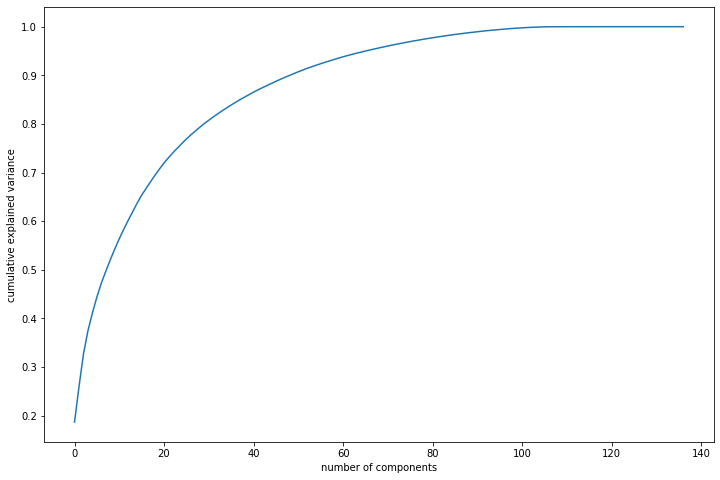

In [86]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [87]:
#taking 90% of variance
pca_again = PCA(0.9)

In [88]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(20934, 50)

In [89]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components=50)# Considering 50 principal components

In [90]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(20934, 50)

In [91]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.042041093146347325 , min corr:  -0.023217897877084462


#### Hence PCA has reduced the correlation among the features

In [92]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape


(8972, 50)

#### Building models on the principal components as obtained after doing PCA
### Model 1: Decision Tree

In [93]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g " % (np.mean(cv_score)))

#### Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

In [94]:
dt_default = DecisionTreeClassifier(class_weight='balanced',max_depth=5,random_state=10)
modelfit(dt_default,X_train_pca,y_train)


Model Report
Accuracy : 0.7808
AUC Score (Train): 0.847911
CV Score : Mean - 0.7924608 


In [95]:
# make predictions
pred_probs_test = dt_default.predict(X_test_pca)
#Let's check the model metrices.
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test,pred_probs_test)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {}'.format(TN / float(TN+FP)))

Roc_auc_score : 0.7474367117015266
Sensitivity/Recall : 0.7715877437325905
Specificity: 0.7232856796704628


In [96]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="roc_auc")

In [97]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   56.9s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.4min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10), n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='roc_auc', verbose=1)

In [98]:
# Printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8050996576994557
DecisionTreeClassifier(max_depth=11, max_features=15, min_samples_leaf=150,
                       min_samples_split=100, random_state=10)


In [99]:
dt_final = DecisionTreeClassifier(max_depth=11,
                             min_samples_leaf=150, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [100]:
print('Model performance on Train data:')
modelfit(dt_final,X_train_pca,y_train)

Model performance on Train data:

Model Report
Accuracy : 0.5518
AUC Score (Train): 0.873520
CV Score : Mean - 0.7978821 


In [101]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
# make predictions
pred_probs_test = dt_default.predict(X_test_pca)
#Let's check the model metrices.
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test,pred_probs_test)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {}'.format(TN / float(TN+FP)))

Roc_auc_score : 0.7474367117015266
Sensitivity/Recall : 0.7715877437325905
Specificity: 0.7232856796704628


In [102]:
#Predicting churn with default 0.5
cut_off_prob=0.5

pred_probs = dt_final.predict_proba(X_train_pca)[:,1]
 
y_train_df= pd.DataFrame({'churn':y_train, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_train_df['final_predicted'] = y_train_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)


In [105]:
#get accuracy metrics for the predicted churn
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train_df.churn,y_train_df.final_predicted)))
print("Recall/Specificity:: {}".format(recall_score(y_train_df.churn,y_train_df.final_predicted)))

Roc_auc_score : 0.5518270342347191
Recall/Specificity:: 0.11176470588235295


#### Since the Recall value is very low for default cut-off probability let's find the optimal cut-off and see if the metrics improve.

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.churn_Prob.map( lambda x: 1 if x > i else 0)
y_train_df.head()

,churn,churn_Prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
21854,0,0.080000,0,1,0,0,0,0,0,0,0,0,0
9520,0,0.072289,0,1,0,0,0,0,0,0,0,0,0
21601,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
28165,0,0.163569,0,1,1,0,0,0,0,0,0,0,0
10243,0,0.141176,0,1,1,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.churn, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.267842  0.203130  1.000000
0.1   0.1  0.787618  0.787148  0.792941
0.2   0.2  0.886978  0.918478  0.530588
0.3   0.3  0.907805  0.952896  0.397647
0.4   0.4  0.917312  0.974576  0.269412
0.5   0.5  0.920417  0.991889  0.111765
0.6   0.6  0.918792  1.000000  0.000000
0.7   0.7  0.918792  1.000000  0.000000
0.8   0.8  0.918792  1.000000  0.000000
0.9   0.9  0.918792  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

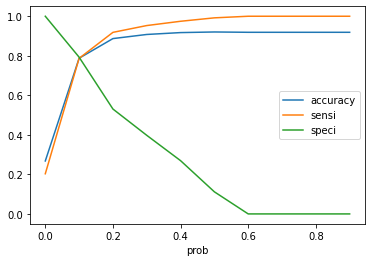

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

#### Selecting 0.1 as optimal cutoff and predicting churn on train and test data with this cut-offprobability

In [109]:
#Predicting churn with optimum 0.1
cut_off_prob=0.1

pred_probs = dt_final.predict_proba(X_train_pca)[:,1]
 
y_train_df= pd.DataFrame({'churn':y_train, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.1 else 0
y_train_df['final_predicted'] = y_train_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)


In [110]:
#get accuracy metrics for the predicted churn on test data
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train_df.churn,y_train_df.final_predicted)))
print("Recall/Specificity:: {}".format(recall_score(y_train_df.churn,y_train_df.final_predicted)))

Roc_auc_score : 0.7900444678235233
Recall/Specificity:: 0.7929411764705883


#### Predicting churn with 0.1 on test data

In [111]:
#Predicting churn with optimum 0.1
cut_off_prob=0.1

pred_probs = dt_final.predict_proba(X_test_pca)[:,1]
 
y_test_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.1 else 0
y_test_df['final_predicted'] = y_test_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)


In [112]:
#get accuracy metrics for the predicted churn on test data
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test_df.churn,y_test_df.final_predicted)))
print("Recall/Specificity:: {}".format(recall_score(y_test_df.churn,y_test_df.final_predicted)))

Roc_auc_score : 0.7448440631131491
Recall/Specificity:: 0.7047353760445683


### Model 1 Results:
#### Train ROC score: 79.0%
#### Train Recall/Specificity score: 79.3%
#### Test ROC score: 74.5%
#### Test Recall/Specificity score: 70.5%

## Model 2: Random Forest

#### We will intially run the model with default parameters and analyse the results.

In [113]:
rfc = RandomForestClassifier(class_weight='balanced')

In [114]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced')

In [115]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [116]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8254
           1       0.63      0.11      0.19       718

    accuracy                           0.92      8972
   macro avg       0.78      0.55      0.58      8972
weighted avg       0.90      0.92      0.90      8972



In [117]:
print(accuracy_score(y_test,predictions))

0.9236513597860009


#### Looking at the results above it is clear that we will need to tune the hyperparameters in order to get better results. We will perform the same in the next few steps.

In [118]:
def hyperparamtuning(score,param):
    scores = score
    # plotting accuracies with param
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

#### Tuning max_depth

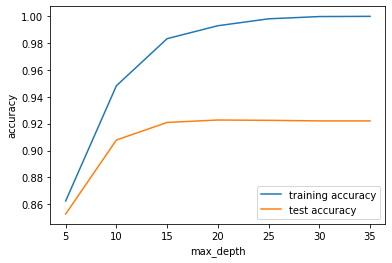

In [119]:
parameters = {'max_depth': range(5, 40, 5)}
rf = RandomForestClassifier(class_weight='balanced')
rfgs = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train)

hyperparamtuning(rfgs.cv_results_,'max_depth')

Selecting max_depth=15

#### Tuning n_estimators

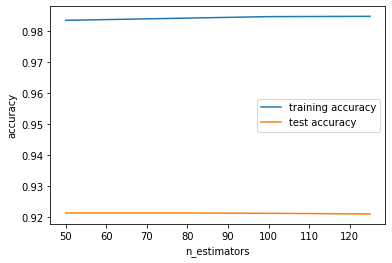

In [120]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(class_weight='balanced',max_depth=15,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="accuracy",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train)

hyperparamtuning(rfgs.cv_results_,'n_estimators')

Selecting n_estimators as 80

#### Tuning max_features

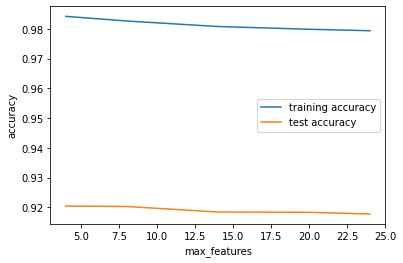

{'max_features': 4}

In [121]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(class_weight='balanced',max_depth=15,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="accuracy",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train)

hyperparamtuning(rfgs.cv_results_,'max_features')

rfgs.best_params_

Selecting max_features=4

#### Tuning min_sample_leaf

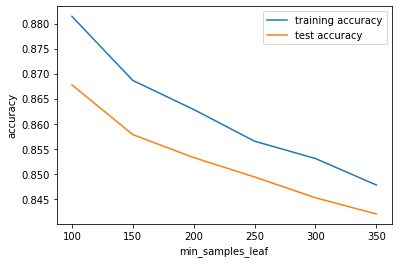

In [122]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(class_weight='balanced',max_depth=15,n_estimators=80,max_features=4,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="accuracy",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train)

hyperparamtuning(rfgs.cv_results_,'min_samples_leaf')

Selecting min_samples_leaf=100

#### Tuning min_sample_split

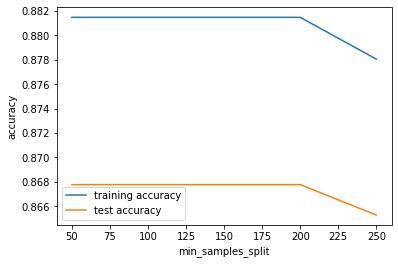

In [123]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(class_weight='balanced',
                             max_depth=15,n_estimators=80,max_features=4,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="accuracy",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train)

hyperparamtuning(rfgs.cv_results_,'min_samples_split')

Selecting min_samples_split= 200

#### Now we will build the model with tunes hyperparameters.

In [124]:
rf_final=RandomForestClassifier(class_weight='balanced',
                                max_depth=15,
                                n_estimators=80,
                                max_features=4,
                                min_samples_leaf=100,
                                min_samples_split=200,
                                random_state=10)

In [125]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train)

Model performance on Train data:

Model Report
Accuracy : 0.8577
AUC Score (Train): 0.934164
CV Score : Mean - 0.8776153 


In [126]:
#Prediction on test set
predictions = rf_final.predict(X_test_pca)

In [127]:
print("Model performance on Test data:")
confusion = metrics.confusion_matrix(y_test, predictions)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test,predictions)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {}'.format(TN / float(TN+FP)))

Model performance on Test data:
Roc_auc_score : 0.8018141621889412
Sensitivity/Recall : 0.7172701949860725
Specificity: 0.88635812939181


In [128]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5

pred_probs = rf_final.predict_proba(X_train_pca)[:,1]
 
y_train_rf= pd.DataFrame({'churn':y_train, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_train_rf['final_predicted'] = y_train_rf.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)

In [129]:
#get accuracy metrics for the predicted churn
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train_rf.churn,y_train_rf.final_predicted)))

Roc_auc_score : 0.8576699655634323


In [130]:
recall_score(y_train_rf.churn,y_train_rf.final_predicted)

0.8311764705882353

#### Predicting churn on test with default cut-off 0.5

In [131]:
prob=0.5
pred_probs = rf_final.predict_proba(X_test_pca)[:,1]
y_test_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_df['final_predicted'] = y_test_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
y_test_df.head()

,churn,churn_Prob,final_predicted
4265,0,0.350536,0
29221,0,0.239026,0
974,0,0.430873,0
1602,0,0.334024,0
10225,0,0.269454,0


In [132]:
#metrics for test
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test_df.churn,y_test_df.final_predicted)))
print("Recall score:{}".format(recall_score(y_test_df.churn,y_test_df.final_predicted)))

Roc_auc_score : 0.8018141621889412
Recall score:0.7172701949860725


### Model 2 Results:
#### Train ROC score: 85.7%
#### Train Recall/Sensitivity score: 83.11%
#### Test ROC score: 80.2%
#### Test Recall/Sensitivity: 71.3%

## Model 3: SVM

#### Initiallywe will build SVM using linear kernal and no hyperparameter tuning. After analysing the results we will perform hyperparameter tuning.

In [133]:
svm0 = SVC(class_weight='balanced',C = 1)

In [134]:
# fit
svm0.fit(X_train_pca, y_train)

# predict on train
y_pred = svm0.predict(X_train_pca)

In [135]:
#Get metrics for default svm
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train,y_pred)))
# Let us calculate specificity
print('Specificity: {}'.format(recall_score(y_train,y_pred)))

Roc_auc_score : 0.8767386185003272
Specificity: 0.8658823529411764


#### Hyperparameter tuning for linear kernal

In [136]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC(class_weight='balanced')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  7.1min finished


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy', verbose=1)

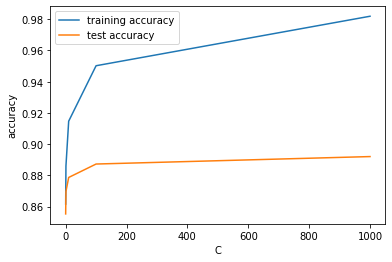

In [137]:
hyperparamtuning(model_cv.cv_results_,'C')

#### Creating final SVM selecting C=100

In [138]:
svm_final = SVC(class_weight='balanced',C = 100)
# fit
svm_final.fit(X_train_pca, y_train)

SVC(C=100, class_weight='balanced')

In [139]:
#predict on train data

y_train_pred = svm_final.predict(X_train_pca)

In [140]:
#get metrics for hyperparameter tuned svm
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train,y_train_pred)))
# Let us calculate specificity
print('Specificity: {}'.format(recall_score(y_train,y_train_pred)))

Roc_auc_score : 0.9635676100532757
Specificity: 0.9841176470588235


In [141]:
# predict on test data
y_pred = svm_final.predict(X_test_pca)

In [142]:
#get metrics for hyperparameter tuned svm
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test,y_pred)))
# Let us calculate specificity
print('Specificity: {}'.format(recall_score(y_test,y_pred)))

Roc_auc_score : 0.7675149315635265
Specificity: 0.6211699164345403


#### Using non linear kernal

In [143]:
svm_k = SVC(class_weight='balanced',C = 100, kernel='rbf')
svm_k.fit(X_train_pca, y_train)

SVC(C=100, class_weight='balanced')

#### Predict on train data

In [144]:
y_train_pred = svm_k.predict(X_train_pca)

In [145]:
#get metrics for hyperparameter tuned svm
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train,y_train_pred)))
# Let us calculate specificity
print('Specificity: {}'.format(recall_score(y_train,y_train_pred)))

Roc_auc_score : 0.9635676100532757
Specificity: 0.9841176470588235


#### Predict on test data

In [146]:
y_pred = svm_k.predict(X_test_pca)

In [147]:
#get metrics for non linear svm
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test,y_pred)))
# Let us calculate specificity
print('Specificity: {}'.format(recall_score(y_test,y_pred)))

Roc_auc_score : 0.7675149315635265
Specificity: 0.6211699164345403


### Model 3 Results:
#### Train ROC score: 96.3%
#### Train Recall/Specificity: 98.4%
#### Test ROC sore: 76.75%
#### Test Recall/Specificity: 62.1%

# Conclusion

### Our interpretability analysis revealed that the following features play an important role in customer churn:

| Sr.No. | Feature   |
|------|------|
| 1 | loc_ic_mou_8   |
|   2  | total_ic_mou_6|
| 3 | arpu_7   |
|   4  | loc_og_mou_8|
| 5 | offnet_mou_8   |
|   6  | total_rech_num_8|
| 7 | onnet_mou_8   |
|   8  | fb_user_8|
| 9 | isd_og_mou_8   |
|   10  | total_month_rech_8|
| 11 | monthly_2g_8   |
|   12  | last_day_rch_amt_8|
| 13 | std_ic_mou_8   |
|   14  | aon|
|   15  | sep_vbc_3g|


### Business Recommendations:

#### 1. Incoming calls for month 8 and month 6 (loc_ic_mou_8 and total_ic_mou_6) and outgoing calls for 8th month (loc_og_mou_8) must be monitored as drop in these is an indicator of potential churn.
#### 2. There is a steep drop in recarge amount in the 8th month (total_rech_num_8, total_month_rech_8 and last_day_rch_amt_8) and features related to that are clear indicators of customer churn. The client can target potential churners with attractive recharge offers and lure them into continuing with them.
#### 3. Customers with lower age on network are more likely to churn. Such customers must be paid attention to in order to prevent churn.
#### 4. Data related features such as monthly_2g_8 and fb_user_8 must also be monitored in order to keep track of churners and must be targeted with specific data related plans to prevent churn.